# Import Librabry

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\mahes\OneDrive\Desktop\DataSet\credit_card_fraud_dataset.csv")
data

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


# General Dataset Overview

In [15]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [13]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [14]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       TransactionID         Amount     MerchantID        IsFraud
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000    2497.092666     501.676070       0.010000
std     28867.657797    1442.415999     288.715868       0.099499
min         1.000000       1.050000       1.000000       0.000000
25%     25000.750000    1247.955000     252.000000       0.000000
50%     50000.500000    2496.500000     503.000000       0.000000
75%     75000.250000    3743.592500     753.000000       0.000000
max    100000.000000    4999.770000    1000.000000       1.000000


# Step 1: Transaction Amount Analysis

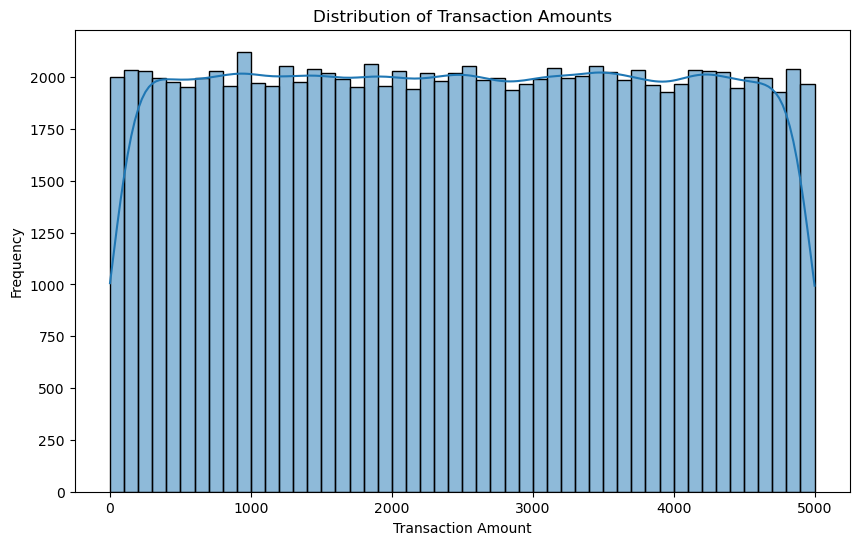

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Step 2: Fraud vs Non-Fraud Transactions

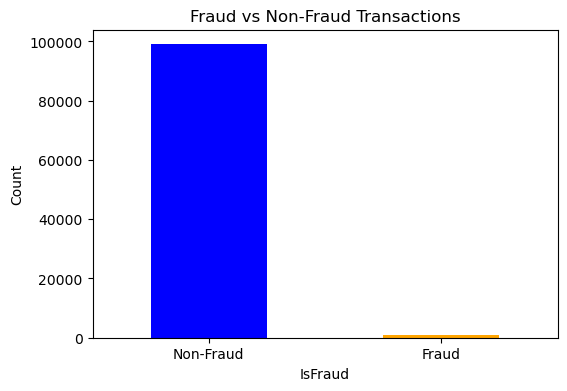

In [4]:
fraud_counts = data['IsFraud'].value_counts()
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.ylabel('Count')
plt.show()

# Step 3: Transaction Type Distribution

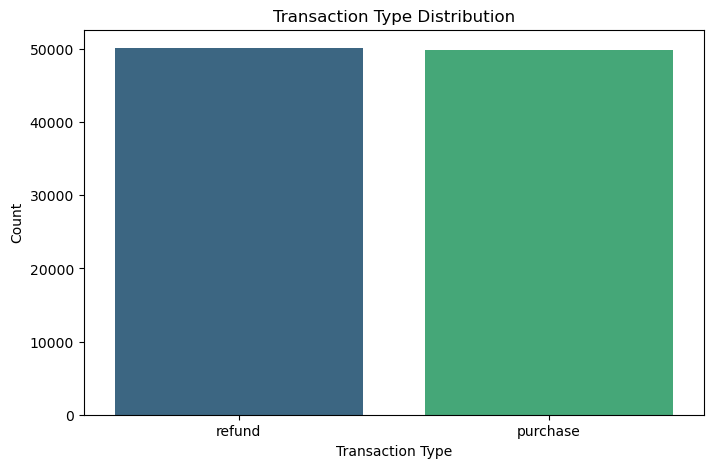

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TransactionType', data=data, palette='viridis', order=data['TransactionType'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Step 4: Fraud by Transaction Type

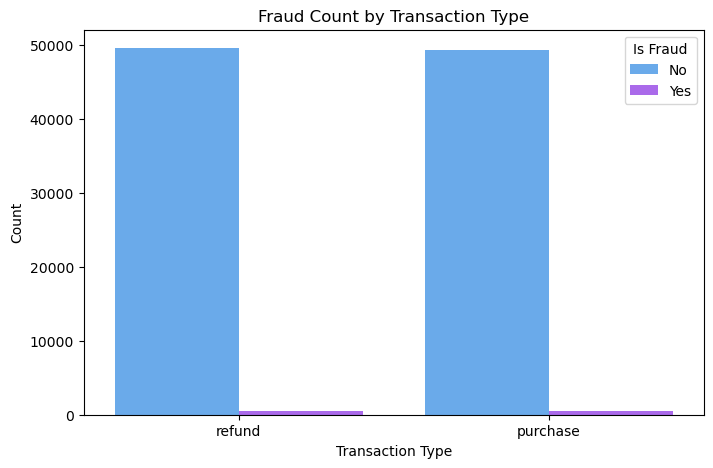

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TransactionType', hue='IsFraud', data=data, palette='cool')
plt.title('Fraud Count by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

# Step 5: Analysis of Transaction Amounts for Fraud vs Non-Fraud

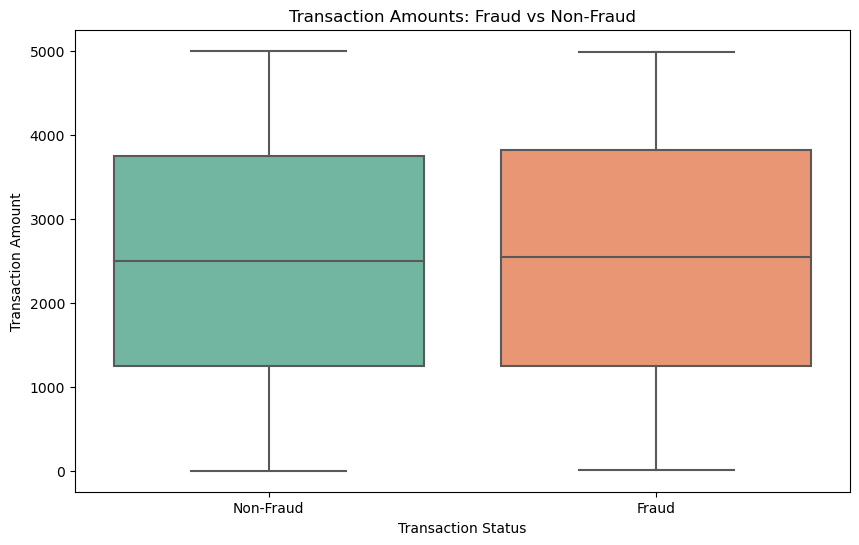

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data, palette='Set2')
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Status')
plt.ylabel('Transaction Amount')
plt.show()

# Step 6: Location Analysis

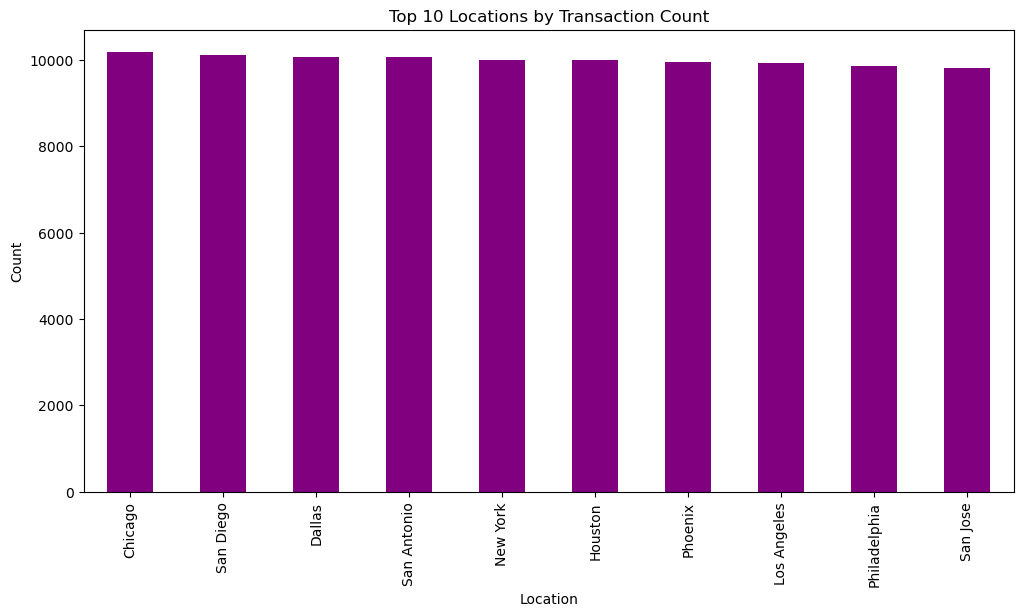

In [8]:
location_counts = data['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Locations by Transaction Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Step 7: Temporal Analysis

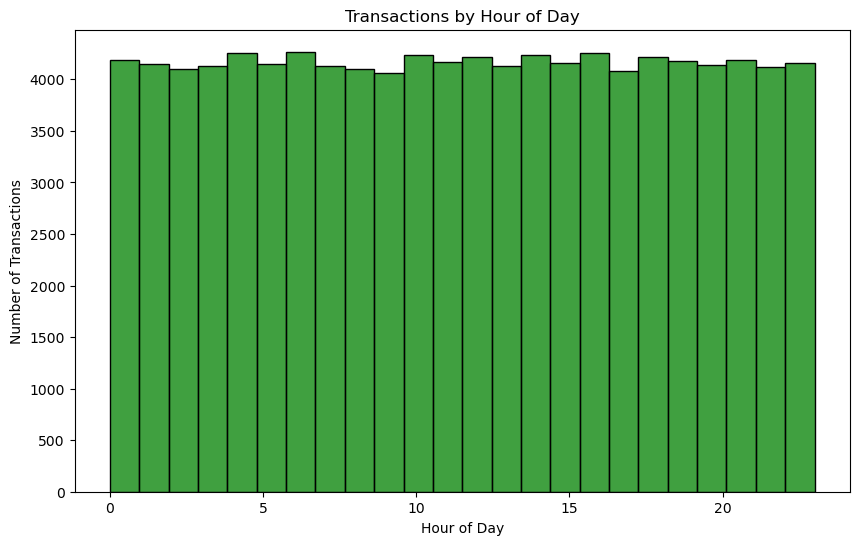

In [9]:
# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Hour'] = data['TransactionDate'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(data['Hour'], bins=24, kde=False, color='green')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

# Step 8: Fraud by Hour of Day

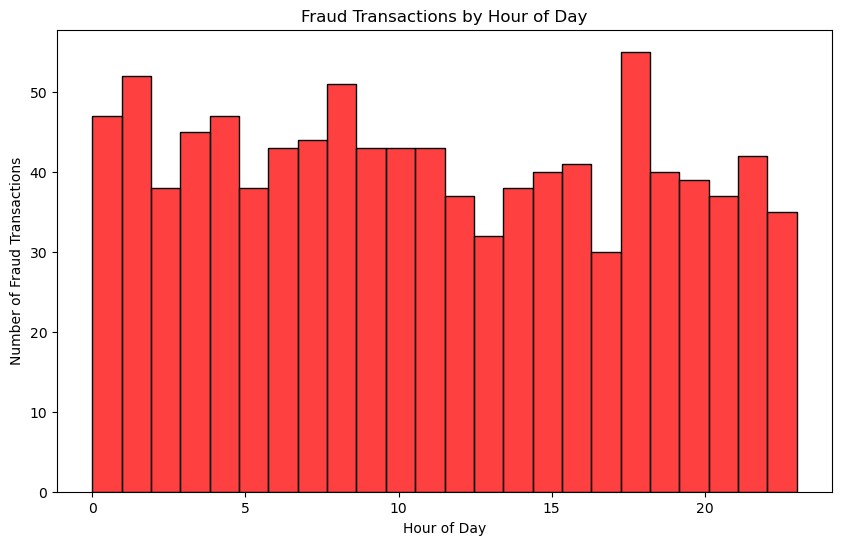

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['IsFraud'] == 1]['Hour'], bins=24, kde=False, color='red')
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# Conclusion

In [11]:
print("EDA Completed. Insights are visualized.")

EDA Completed. Insights are visualized.


In [17]:
print("EDA Completed. Key Insights:")
print("1. Most transaction amounts are small, with a few high-value outliers.")
print("2. Fraudulent transactions make up a small proportion of the dataset, indicating class imbalance.")
print("3. Certain transaction types, such as refunds, may be more prone to fraud.")
print("4. Fraudulent transactions often differ in amount distribution compared to non-fraudulent ones.")
print("5. Some locations have higher transaction counts and could be fraud hotspots.")
print("6. Transactions peak during business hours, while fraud may peak at odd hours.")

EDA Completed. Key Insights:
1. Most transaction amounts are small, with a few high-value outliers.
2. Fraudulent transactions make up a small proportion of the dataset, indicating class imbalance.
3. Certain transaction types, such as refunds, may be more prone to fraud.
4. Fraudulent transactions often differ in amount distribution compared to non-fraudulent ones.
5. Some locations have higher transaction counts and could be fraud hotspots.
6. Transactions peak during business hours, while fraud may peak at odd hours.
